In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [16]:
# ----- Descriptive Statistics -----
def descriptive_stats(data, label):
    print(f"\n--- Descriptive Statistics: {label} ---")
    print(f"Count: {len(data)}")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Standard Deviation: {np.std(data, ddof=1):.2f}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")

In [18]:
# test functions
def shapiro_wilk_test(data, label):
    stat, p = stats.shapiro(data)
    print(f"\nShapiro-Wilk Test ({label}): W = {stat:.4f}, p = {p:.4f}")
    return p

def levene_test(g1, g2):
    stat, p = stats.levene(g1, g2)
    print(f"\nLevene’s Test: W = {stat:.4f}, p = {p:.4f}")
    return p

def t_test(g1, g2, equal_var=True):
    stat, p = stats.ttest_ind(g1, g2, equal_var=equal_var)
    print(f"\nT-Test (equal_var={equal_var}): t = {stat:.4f}, p = {p:.4f}")
    return p

def mann_whitney_u(g1, g2):
    stat, p = stats.mannwhitneyu(g1, g2, alternative='two-sided')
    print(f"\nMann–Whitney U Test: U = {stat}, p = {p:.4f}")
    return p

def cohens_d(g1, g2):
    mean_diff = np.mean(g1) - np.mean(g2)
    pooled_sd = np.sqrt(((len(g1)-1)*np.var(g1, ddof=1) + (len(g2)-1)*np.var(g2, ddof=1)) / (len(g1) + len(g2) - 2))
    d = mean_diff / pooled_sd
    print(f"\nCohen's d: {d:.4f}")
    return d


In [19]:
# ----- Visualization -----
def plot_distributions(g1, g2):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(g1, bins=range(0, 7), alpha=0.6, label='Group 1', color='skyblue', edgecolor='black', density=True)
    plt.hist(g2, bins=range(0, 7), alpha=0.6, label='Group 2', color='salmon', edgecolor='black', density=True)
    plt.title("Histogram of Scores")
    plt.xlabel("Scores")
    plt.ylabel("Density")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.boxplot([g1, g2], labels=["Group 1", "Group 2"])
    plt.title("Boxplot of Scores")
    plt.ylabel("Score")

    plt.tight_layout()
    plt.show()

=== Statistical Analysis Between Two Learning Methods ===

--- Descriptive Statistics: Group 1 ---
Count: 100
Mean: 2.37
Median: 2.00
Standard Deviation: 1.70
Minimum: 0
Maximum: 5

--- Descriptive Statistics: Group 2 ---
Count: 100
Mean: 2.54
Median: 3.00
Standard Deviation: 1.73
Minimum: 0
Maximum: 5

Shapiro-Wilk Test (Group 1): W = 0.9003, p = 0.0000

Shapiro-Wilk Test (Group 2): W = 0.9027, p = 0.0000

Mann–Whitney U Test: U = 4709.5, p = 0.4717

Cohen's d: -0.0991


C:\Users\aayus\AppData\Local\Temp\ipykernel_8700\87196274.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g1, g2], labels=["Group 1", "Group 2"])


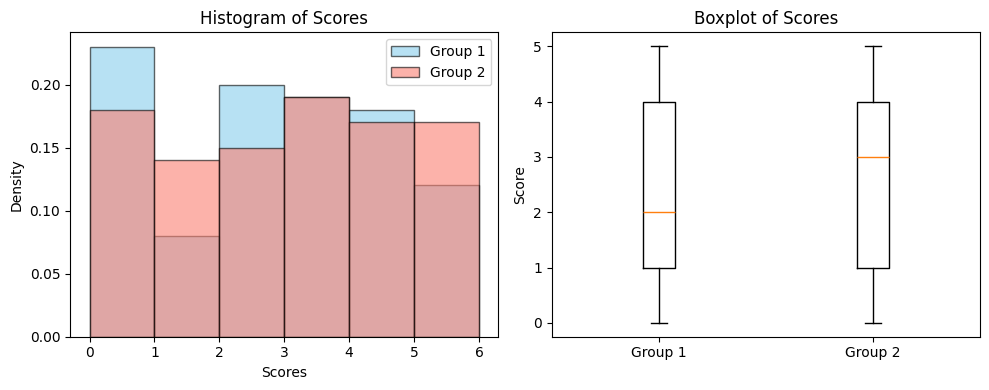

In [22]:
print("=== Statistical Analysis Between Two Learning Methods ===")

group1_scores = np.random.choice(range(0, 6), 100)
group2_scores = np.random.choice(range(0, 6), 100)

# Descriptive statistics
descriptive_stats(group1_scores, "Group 1")
descriptive_stats(group2_scores, "Group 2")

# Step 1: Normality Check
p1 = shapiro_wilk_test(group1_scores, "Group 1")
p2 = shapiro_wilk_test(group2_scores, "Group 2")

# Step 2: Test Selection
if p1 > 0.05 and p2 > 0.05:
    p_var = levene_test(group1_scores, group2_scores)
    equal_var = p_var > 0.05
    t_test(group1_scores, group2_scores, equal_var=equal_var)
else:
    mann_whitney_u(group1_scores, group2_scores)

# Step 3: Effect Size
cohens_d(group1_scores, group2_scores)

# Step 4: Plotting
plot_distributions(group1_scores, group2_scores)

